# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [31]:
# Step 1 : import 
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import HTML

In [5]:
# Step 2: read data 
df = pd.read_csv("movies_complete.csv")
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [6]:
# note: some columns are nan in budget_musd & revenue_musd
# make the format prettier 
df = pd.read_csv("movies_complete.csv",parse_dates = ["release_date"])

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

In [55]:
# get the infomation required for best & worst movies
df_best = df[["title","poster_path","budget_musd","revenue_musd","vote_count","vote_average","popularity"]].copy()
df_best

,title,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943
1,Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539
2,Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900
3,Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34.0,6.1,3.859495
4,Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173.0,5.7,8.387519
...,...,...,...,...,...,...,...
44686,Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.0,4.0,0.072051
44687,Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.0,9.0,0.178241
44688,Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.0,3.8,0.903007
44689,Satan Triumphant,<img src='http://image.tmdb.org/t/p/w185//aorB...,NaN,NaN,0.0,NaN,0.003503


In [59]:
#add new column for profit & ROI
df_best["profit"] = df["revenue_musd"] - df["budget_musd"]
df_best["ROI"] = df["revenue_musd"] / df["budget_musd"]
df_best


,title,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit,ROI
0,Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
3,Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
4,Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44686,Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
44687,Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
44688,Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.0,3.8,0.903007,NaN,NaN
44689,Satan Triumphant,<img src='http://image.tmdb.org/t/p/w185//aorB...,NaN,NaN,0.0,NaN,0.003503,NaN,NaN


In [60]:
# rename columns
df_best.columns = ["Title","Postpage","Budget","Revenue","Votes","AvgRating","Popularity","Profit","ROI"]
df_best

,Title,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
0,Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
3,Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
4,Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44686,Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
44687,Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
44688,Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.0,3.8,0.903007,NaN,NaN
44689,Satan Triumphant,<img src='http://image.tmdb.org/t/p/w185//aorB...,NaN,NaN,0.0,NaN,0.003503,NaN,NaN


In [61]:
df_best.set_index("Title",inplace = True)
df_best

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.0,3.8,0.903007,NaN,NaN


In [67]:
# fillna
df_best["Budget"].fillna(0,inplace = True)
df_best["Revenue"].fillna(0,inplace = True)
df_best["Votes"].fillna(0,inplace = True)

__Define__ an appropriate __user-defined function__ to reuse code.

In [76]:
#  define function 
# def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):

#     df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes), 
#                       ["", by]].sort_values(by = by, ascending = ascending).head(n).copy()
    
#     return HTML(df2.to_html(escape = False))

__Movies Top 5 - Highest Revenue__

In [78]:
# 2-1 :Highest Revenue
df_best = df_best.sort_values(by ="Revenue",ascending = False)
subset = df_best.iloc[:5,:3]
subset

,Postpage,Budget,Revenue
Title,,,
Avatar,<img src='http://image.tmdb.org/t/p/w185//btnl...,237.0,2787.965087
Star Wars: The Force Awakens,<img src='http://image.tmdb.org/t/p/w185//9rd0...,245.0,2068.223624
Titanic,<img src='http://image.tmdb.org/t/p/w185//9xjZ...,200.0,1845.034188
The Avengers,<img src='http://image.tmdb.org/t/p/w185//RYMX...,220.0,1519.557910
Jurassic World,<img src='http://image.tmdb.org/t/p/w185//rhr4...,150.0,1513.528810


In [81]:
HTML(subset.to_html(escape = False))

,Postpage,Budget,Revenue
Title,,,
Avatar,,237.0,2787.965087
Star Wars: The Force Awakens,,245.0,2068.223624
Titanic,,200.0,1845.034188
The Avengers,,220.0,1519.557910
Jurassic World,,150.0,1513.528810


__Movies Top 5 - Highest Budget__

In [82]:
df_best = df_best.sort_values(by ="Budget",ascending = False)
subset = df_best.iloc[:5,:3]
subset

,Postpage,Budget,Revenue
Title,,,
Pirates of the Caribbean: On Stranger Tides,<img src='http://image.tmdb.org/t/p/w185//keGf...,380.0,1045.713802
Pirates of the Caribbean: At World's End,<img src='http://image.tmdb.org/t/p/w185//oVh3...,300.0,961.000000
Avengers: Age of Ultron,<img src='http://image.tmdb.org/t/p/w185//4ssD...,280.0,1405.403694
Superman Returns,<img src='http://image.tmdb.org/t/p/w185//6ZYO...,270.0,391.081192
John Carter,<img src='http://image.tmdb.org/t/p/w185//7GSS...,260.0,284.139100


In [83]:
HTML(subset.to_html(escape = False))

,Postpage,Budget,Revenue
Title,,,
Pirates of the Caribbean: On Stranger Tides,,380.0,1045.713802
Pirates of the Caribbean: At World's End,,300.0,961.000000
Avengers: Age of Ultron,,280.0,1405.403694
Superman Returns,,270.0,391.081192
John Carter,,260.0,284.139100


__Movies Top 5 - Highest Profit__

In [86]:
df_best = df_best.sort_values(by = "Profit", ascending = False)
subset = df_best.iloc[:5,:]
subset

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Avatar,<img src='http://image.tmdb.org/t/p/w185//btnl...,237.0,2787.965087,12114.0,7.2,185.070892,2550.965087,11.763566
Star Wars: The Force Awakens,<img src='http://image.tmdb.org/t/p/w185//9rd0...,245.0,2068.223624,7993.0,7.5,31.626013,1823.223624,8.441729
Titanic,<img src='http://image.tmdb.org/t/p/w185//9xjZ...,200.0,1845.034188,7770.0,7.5,26.889070,1645.034188,9.225171
Jurassic World,<img src='http://image.tmdb.org/t/p/w185//rhr4...,150.0,1513.528810,8842.0,6.5,32.790475,1363.528810,10.090192
Furious 7,<img src='http://image.tmdb.org/t/p/w185//d9jZ...,190.0,1506.249360,4253.0,7.3,27.275687,1316.249360,7.927628


In [87]:
HTML(subset.to_html(escape = False))

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Avatar,,237.0,2787.965087,12114.0,7.2,185.070892,2550.965087,11.763566
Star Wars: The Force Awakens,,245.0,2068.223624,7993.0,7.5,31.626013,1823.223624,8.441729
Titanic,,200.0,1845.034188,7770.0,7.5,26.889070,1645.034188,9.225171
Jurassic World,,150.0,1513.528810,8842.0,6.5,32.790475,1363.528810,10.090192
Furious 7,,190.0,1506.249360,4253.0,7.3,27.275687,1316.249360,7.927628


__Movies Top 5 - Lowest Profit__

In [88]:
df_best = df_best.sort_values(by = "Profit", ascending = True)
subset = df_best.iloc[:5,:]
subset

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
The Lone Ranger,<img src='http://image.tmdb.org/t/p/w185//b2je...,255.000000,89.289910,2361.0,5.9,12.729104,-165.710090,0.350157
The Alamo,<img src='http://image.tmdb.org/t/p/w185//aZrW...,145.000000,25.819961,108.0,5.8,12.240901,-119.180039,0.178069
Mars Needs Moms,<img src='http://image.tmdb.org/t/p/w185//lOKq...,150.000000,38.992758,202.0,5.6,7.247170,-111.007242,0.259952
Valerian and the City of a Thousand Planets,<img src='http://image.tmdb.org/t/p/w185//jfIp...,197.471676,90.024292,905.0,6.7,15.262706,-107.447384,0.455885
The 13th Warrior,<img src='http://image.tmdb.org/t/p/w185//7pyh...,160.000000,61.698899,524.0,6.4,10.308026,-98.301101,0.385618


In [89]:
HTML(subset.to_html(escape = False))

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
The Lone Ranger,,255.000000,89.289910,2361.0,5.9,12.729104,-165.710090,0.350157
The Alamo,,145.000000,25.819961,108.0,5.8,12.240901,-119.180039,0.178069
Mars Needs Moms,,150.000000,38.992758,202.0,5.6,7.247170,-111.007242,0.259952
Valerian and the City of a Thousand Planets,,197.471676,90.024292,905.0,6.7,15.262706,-107.447384,0.455885
The 13th Warrior,,160.000000,61.698899,524.0,6.4,10.308026,-98.301101,0.385618


__Movies Top 5 - Highest ROI__

In [122]:
df_ROI = df_best.sort_values(by = "ROI", ascending = False)
# df_ROI
 
subset = df_ROI[df_ROI.Budget >= 50]
top5_ROI = subset.iloc[:5,:]
top5_ROI

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Minions,<img src='http://image.tmdb.org/t/p/w185//tMaG...,74.0,1156.730962,4729.0,6.4,547.488298,1082.730962,15.631499
Jurassic Park,<img src='http://image.tmdb.org/t/p/w185//oU7O...,63.0,920.100000,4956.0,7.6,8.863776,857.100000,14.604762
The Twilight Saga: New Moon,<img src='http://image.tmdb.org/t/p/w185//j5jM...,50.0,709.827462,2518.0,5.6,30.121292,659.827462,14.196549
Deadpool,<img src='http://image.tmdb.org/t/p/w185//fSRb...,58.0,783.112979,11444.0,7.4,187.860492,725.112979,13.501948
Despicable Me 2,<img src='http://image.tmdb.org/t/p/w185//xL6t...,76.0,970.761885,4729.0,7.0,24.823550,894.761885,12.773183


In [123]:
HTML(top5_ROI.to_html(escape = False))

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Minions,,74.0,1156.730962,4729.0,6.4,547.488298,1082.730962,15.631499
Jurassic Park,,63.0,920.100000,4956.0,7.6,8.863776,857.100000,14.604762
The Twilight Saga: New Moon,,50.0,709.827462,2518.0,5.6,30.121292,659.827462,14.196549
Deadpool,,58.0,783.112979,11444.0,7.4,187.860492,725.112979,13.501948
Despicable Me 2,,76.0,970.761885,4729.0,7.0,24.823550,894.761885,12.773183


__Movies Top 5 - Lowest ROI__

In [127]:
df_ROI = df_best.sort_values(by = "ROI", ascending = True)
# df_ROI
 
subset = df_ROI[df_ROI.Budget >= 100]
lowest5_ROI = subset.iloc[:5,:]
lowest5_ROI

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
The Adventures of Pluto Nash,<img src='http://image.tmdb.org/t/p/w185//96vv...,100.0,7.103973,143.0,4.4,8.903754,-92.896027,0.071040
The Alamo,<img src='http://image.tmdb.org/t/p/w185//aZrW...,145.0,25.819961,108.0,5.8,12.240901,-119.180039,0.178069
Live by Night,<img src='http://image.tmdb.org/t/p/w185//bkd4...,108.0,22.678555,416.0,6.2,19.943930,-85.321445,0.209987
Mars Needs Moms,<img src='http://image.tmdb.org/t/p/w185//lOKq...,150.0,38.992758,202.0,5.6,7.247170,-111.007242,0.259952
The Lone Ranger,<img src='http://image.tmdb.org/t/p/w185//b2je...,255.0,89.289910,2361.0,5.9,12.729104,-165.710090,0.350157


In [128]:
HTML(lowest5_ROI.to_html(escape = False))

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
The Adventures of Pluto Nash,,100.0,7.103973,143.0,4.4,8.903754,-92.896027,0.071040
The Alamo,,145.0,25.819961,108.0,5.8,12.240901,-119.180039,0.178069
Live by Night,,108.0,22.678555,416.0,6.2,19.943930,-85.321445,0.209987
Mars Needs Moms,,150.0,38.992758,202.0,5.6,7.247170,-111.007242,0.259952
The Lone Ranger,,255.0,89.289910,2361.0,5.9,12.729104,-165.710090,0.350157


__Movies Top 5 - Most Votes__

In [129]:
df_best = df_best.sort_values(by = "Votes", ascending = False)
subset = df_best.iloc[:5,:]
subset

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Inception,<img src='http://image.tmdb.org/t/p/w185//9gk7...,160.0,825.532764,14075.0,8.1,29.108149,665.532764,5.159580
The Dark Knight,<img src='http://image.tmdb.org/t/p/w185//qJ2t...,185.0,1004.558444,12269.0,8.3,123.167259,819.558444,5.430046
Avatar,<img src='http://image.tmdb.org/t/p/w185//btnl...,237.0,2787.965087,12114.0,7.2,185.070892,2550.965087,11.763566
The Avengers,<img src='http://image.tmdb.org/t/p/w185//RYMX...,220.0,1519.557910,12000.0,7.4,89.887648,1299.557910,6.907081
Deadpool,<img src='http://image.tmdb.org/t/p/w185//fSRb...,58.0,783.112979,11444.0,7.4,187.860492,725.112979,13.501948


In [130]:
HTML(subset.to_html(escape = False))

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Inception,,160.0,825.532764,14075.0,8.1,29.108149,665.532764,5.159580
The Dark Knight,,185.0,1004.558444,12269.0,8.3,123.167259,819.558444,5.430046
Avatar,,237.0,2787.965087,12114.0,7.2,185.070892,2550.965087,11.763566
The Avengers,,220.0,1519.557910,12000.0,7.4,89.887648,1299.557910,6.907081
Deadpool,,58.0,783.112979,11444.0,7.4,187.860492,725.112979,13.501948


__Movies Top 5 - Highest Rating__

In [138]:
df_Rating = df_best.sort_values(by = "AvgRating", ascending = False)

 
subset = df_Rating[df_Rating.Votes >= 50]
top5_Rating = subset.iloc[:5,:]
top5_Rating

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Planet Earth II,<img src='http://image.tmdb.org/t/p/w185//gTvA...,0.0,0.0,50.0,9.5,5.651997,NaN,NaN
Dilwale Dulhania Le Jayenge,<img src='http://image.tmdb.org/t/p/w185//2CAL...,13.2,100.0,661.0,9.1,34.457024,86.8,7.575758
Planet Earth,<img src='http://image.tmdb.org/t/p/w185//koVz...,0.0,0.0,176.0,8.8,4.501137,NaN,NaN
Sansho the Bailiff,<img src='http://image.tmdb.org/t/p/w185//p64i...,0.0,0.0,68.0,8.7,5.104286,NaN,NaN
Human,<img src='http://image.tmdb.org/t/p/w185//vdZg...,13.0,0.0,98.0,8.6,3.845853,NaN,NaN


In [139]:
HTML(top5_Rating.to_html(escape = False))

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Planet Earth II,,0.0,0.0,50.0,9.5,5.651997,NaN,NaN
Dilwale Dulhania Le Jayenge,,13.2,100.0,661.0,9.1,34.457024,86.8,7.575758
Planet Earth,,0.0,0.0,176.0,8.8,4.501137,NaN,NaN
Sansho the Bailiff,,0.0,0.0,68.0,8.7,5.104286,NaN,NaN
Human,,13.0,0.0,98.0,8.6,3.845853,NaN,NaN


__Movies Top 5 - Lowest Rating__

In [140]:
df_Rating = df_best.sort_values(by = "AvgRating", ascending = True)

 
subset = df_Rating[df_Rating.Votes >= 100]
worst5_Rating = subset.iloc[:5,:]
worst5_Rating

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
House of the Dead,<img src='http://image.tmdb.org/t/p/w185//5jBI...,7.0,13.818181,106.0,2.8,5.701278,6.818181,1.974026
Dragonball Evolution,<img src='http://image.tmdb.org/t/p/w185//23Pc...,100.0,0.000000,475.0,2.9,8.876305,NaN,NaN
Battlefield Earth,<img src='http://image.tmdb.org/t/p/w185//wXCR...,44.0,21.400000,259.0,3.0,5.276926,-22.600000,0.486364
Alone in the Dark,<img src='http://image.tmdb.org/t/p/w185//tQZb...,20.0,10.442808,174.0,3.1,5.871243,-9.557192,0.522140
Disaster Movie,<img src='http://image.tmdb.org/t/p/w185//3J8X...,25.0,14.109284,250.0,3.1,11.634132,-10.890716,0.564371


In [141]:
HTML(worst5_Rating.to_html(escape = False))

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
House of the Dead,,7.0,13.818181,106.0,2.8,5.701278,6.818181,1.974026
Dragonball Evolution,,100.0,0.000000,475.0,2.9,8.876305,NaN,NaN
Battlefield Earth,,44.0,21.400000,259.0,3.0,5.276926,-22.600000,0.486364
Alone in the Dark,,20.0,10.442808,174.0,3.1,5.871243,-9.557192,0.522140
Disaster Movie,,25.0,14.109284,250.0,3.1,11.634132,-10.890716,0.564371


__Movies Top 5 - Most Popular__

In [142]:
df_best = df_best.sort_values(by = "Popularity", ascending = False)
subset = df_best.iloc[:5,:]
subset

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Minions,<img src='http://image.tmdb.org/t/p/w185//tMaG...,74.0,1156.730962,4729.0,6.4,547.488298,1082.730962,15.631499
Wonder Woman,<img src='http://image.tmdb.org/t/p/w185//gfJG...,149.0,820.580447,5025.0,7.2,294.337037,671.580447,5.507251
Beauty and the Beast,<img src='http://image.tmdb.org/t/p/w185//tWqi...,160.0,1262.886337,5530.0,6.8,287.253654,1102.886337,7.893040
Baby Driver,<img src='http://image.tmdb.org/t/p/w185//rmnQ...,34.0,224.511319,2083.0,7.2,228.032744,190.511319,6.603274
Big Hero 6,<img src='http://image.tmdb.org/t/p/w185//xozr...,165.0,652.105443,6289.0,7.8,213.849907,487.105443,3.952154


In [143]:
HTML(subset.to_html(escape = False))

,Postpage,Budget,Revenue,Votes,AvgRating,Popularity,Profit,ROI
Title,,,,,,,,
Minions,,74.0,1156.730962,4729.0,6.4,547.488298,1082.730962,15.631499
Wonder Woman,,149.0,820.580447,5025.0,7.2,294.337037,671.580447,5.507251
Beauty and the Beast,,160.0,1262.886337,5530.0,6.8,287.253654,1102.886337,7.893040
Baby Driver,,34.0,224.511319,2083.0,7.2,228.032744,190.511319,6.603274
Big Hero 6,,165.0,652.105443,6289.0,7.8,213.849907,487.105443,3.952154


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [155]:
Bruce_genres = df.genres.str.contains("Action") & df.genres.str.contains("Science Fiction")
Bruce_cast = df.cast.str.contains("Bruce Willis")
Bruce = df.loc[Bruce_genres & Bruce_cast,["title","poster_path","vote_average"]].sort_values(by = "vote_average",ascending = False).set_index("title")
Bruce

,poster_path,vote_average
title,,
The Fifth Element,<img src='http://image.tmdb.org/t/p/w185//fPtl...,7.3
Looper,<img src='http://image.tmdb.org/t/p/w185//sNjL...,6.6
Armageddon,<img src='http://image.tmdb.org/t/p/w185//fMtO...,6.5
Surrogates,<img src='http://image.tmdb.org/t/p/w185//v3Z0...,5.9
G.I. Joe: Retaliation,<img src='http://image.tmdb.org/t/p/w185//3rWI...,5.4
Vice,<img src='http://image.tmdb.org/t/p/w185//nPqN...,4.1


In [156]:
HTML(Bruce.to_html(escape = False))

,poster_path,vote_average
title,,
The Fifth Element,,7.3
Looper,,6.6
Armageddon,,6.5
Surrogates,,5.9
G.I. Joe: Retaliation,,5.4
Vice,,4.1


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [157]:
Quentin_director = df.director.str.contains("Quentin Tarantino") 
Quentin_cast = df.cast.str.contains("Uma Thurman")
Quentin = df.loc[Quentin_director & Quentin_cast,["title","poster_path","runtime"]].sort_values(by = "runtime",ascending = True).set_index("title")
Quentin

,poster_path,runtime
title,,
Kill Bill: Vol. 1,<img src='http://image.tmdb.org/t/p/w185//v7Ta...,111.0
Kill Bill: Vol. 2,<img src='http://image.tmdb.org/t/p/w185//2yhg...,136.0
Pulp Fiction,<img src='http://image.tmdb.org/t/p/w185//d5iI...,154.0


In [158]:
HTML(Quentin.to_html(escape = False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.0
Kill Bill: Vol. 2,,136.0
Pulp Fiction,,154.0


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [159]:
Pixar_production_companies = df.production_companies.str.contains("Pixar") 
Pixar_release_date = df.release_date.between("2010-01-01", "2015-12-31")

Pixar = df.loc[Pixar_production_companies & Pixar_release_date,["title","poster_path","revenue_musd","release_date"]].sort_values(by = "revenue_musd",ascending = False).set_index("title")
Pixar

,poster_path,revenue_musd,release_date
title,,,
Toy Story 3,<img src='http://image.tmdb.org/t/p/w185//amY0...,1066.969703,2010-06-16
Inside Out,<img src='http://image.tmdb.org/t/p/w185//lRHE...,857.611174,2015-06-09
Monsters University,<img src='http://image.tmdb.org/t/p/w185//tyHH...,743.559607,2013-06-20
Cars 2,<img src='http://image.tmdb.org/t/p/w185//okIz...,559.852396,2011-06-11
Brave,<img src='http://image.tmdb.org/t/p/w185//8l0p...,538.983207,2012-06-21
The Good Dinosaur,<img src='http://image.tmdb.org/t/p/w185//8RSk...,331.926147,2015-11-14
Day & Night,<img src='http://image.tmdb.org/t/p/w185//eQ1Q...,NaN,2010-06-17
The Blue Umbrella,<img src='http://image.tmdb.org/t/p/w185//iSWV...,NaN,2013-02-12
Toy Story of Terror!,<img src='http://image.tmdb.org/t/p/w185//aNDr...,NaN,2013-10-15


In [160]:
HTML(Pixar.to_html(escape = False))

,poster_path,revenue_musd,release_date
title,,,
Toy Story 3,,1066.969703,2010-06-16
Inside Out,,857.611174,2015-06-09
Monsters University,,743.559607,2013-06-20
Cars 2,,559.852396,2011-06-11
Brave,,538.983207,2012-06-21
The Good Dinosaur,,331.926147,2015-11-14
Day & Night,,NaN,2010-06-17
The Blue Umbrella,,NaN,2013-02-12
Toy Story of Terror!,,NaN,2013-10-15


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [161]:
next_mov_genres = df.genres.str.contains("Action") | df.genres.str.contains("Thriller")
next_mov_lan = df.original_language =="en"
mask_vote_av = df.vote_average >= 7.5 

next_mov = df.loc[next_mov_genres & next_mov_lan & mask_vote_av , 
               ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values(by = "release_date", ascending = False).set_index("title").head(20)
next_mov

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,<img src='http://image.tmdb.org/t/p/w185//8BNy...,TV Movie|Family|Action|Comedy|Music|Adventure,7.5,171.0,2017-07-21
Dunkirk,<img src='http://image.tmdb.org/t/p/w185//ebSn...,Action|Drama|History|Thriller|War,7.5,2712.0,2017-07-19
The Book of Henry,<img src='http://image.tmdb.org/t/p/w185//suLF...,Thriller|Drama|Crime,7.6,84.0,2017-06-16
Guardians of the Galaxy Vol. 2,<img src='http://image.tmdb.org/t/p/w185//y4MB...,Action|Adventure|Comedy|Science Fiction,7.6,4858.0,2017-04-19
Revengeance,<img src='http://image.tmdb.org/t/p/w185//p4St...,Comedy|Action|Animation,8.0,2.0,2017-04-05
First Round Down,<img src='http://image.tmdb.org/t/p/w185//91uJ...,Action|Comedy,10.0,1.0,2017-03-04
Logan,<img src='http://image.tmdb.org/t/p/w185//fnbj...,Action|Drama|Science Fiction,7.6,6310.0,2017-02-28
Tomato Red,NaN,Drama|Thriller,8.0,2.0,2017-02-24
Zero 3,<img src='http://image.tmdb.org/t/p/w185//ayp1...,Thriller,8.7,3.0,2017-01-27


In [162]:
HTML(next_mov.to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.5,171.0,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.5,2712.0,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.6,84.0,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.6,4858.0,2017-04-19
Revengeance,,Comedy|Action|Animation,8.0,2.0,2017-04-05
First Round Down,,Action|Comedy,10.0,1.0,2017-03-04
Logan,,Action|Drama|Science Fiction,7.6,6310.0,2017-02-28
Tomato Red,NaN,Drama|Thriller,8.0,2.0,2017-02-24
Zero 3,,Thriller,8.7,3.0,2017-01-27


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

In [167]:
# mean revenue 
df["Franchise"] = df.belongs_to_collection.notna()
df["Franchise"].value_counts()
#  False is 40228, which represents most of the movies are standalone 

False    40228
True      4463
Name: Franchise, dtype: int64

__Franchise vs. Stand-alone: Average Revenue__

In [169]:
df.groupby("Franchise").revenue_musd.mean()
# franchise median revenue is more than standalone 

Franchise
False     44.742814
True     165.708193
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [171]:
df["ROI"] = df["revenue_musd"] / df["budget_musd"]
df.groupby("Franchise").ROI.median()
# Franchises movie ROI is much higher than standalone movie

Franchise
False    1.619699
True     3.709195
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [172]:
df.groupby("Franchise").budget_musd.mean()
# Franchises movie budget is much higher than standalone movie

Franchise
False    18.047741
True     38.319847
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [173]:
df.groupby("Franchise").popularity.mean()
# Franchises movie more populat than standalone movie

Franchise
False    2.592726
True     6.245051
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [174]:
df.groupby("Franchise").vote_average.mean()
# Franchises movie rating is not more rating  than standalone movie

Franchise
False    6.008787
True     5.956806
Name: vote_average, dtype: float64

In [175]:
# aggregate table 
df.groupby("Franchise").agg({"revenue_musd":"mean","budget_musd":"mean", "vote_average":"mean","popularity":"mean","ROI":"median","vote_count":"mean"
    
})

,revenue_musd,budget_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,44.742814,18.047741,6.008787,2.592726,1.619699,78.289550
True,165.708193,38.319847,5.956806,6.245051,3.709195,412.387856


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [176]:
df["belongs_to_collection"].value_counts()

The Bowery Boys                   29
Totò Collection                   27
James Bond Collection             26
Zatôichi: The Blind Swordsman     26
The Carry On Collection           25
                                  ..
All for ...                        1
Constantine Collection             1
You Got Served Collection          1
Tomtar och Trolltyg Collection     1
Valami Amerika gyűjtemény          1
Name: belongs_to_collection, Length: 1691, dtype: int64

In [179]:
franchises = df.groupby("belongs_to_collection").agg({"title":"count",
                                                      "revenue_musd":["sum","mean"],
                                                      "budget_musd":["sum","mean"], 
                                                      "vote_average":"mean",
                                                      "popularity":"mean",
                                                      "ROI":"median",
                                                      "vote_count":"mean"   })
franchises

title revenue_musd              \
                                     count          sum        mean   
belongs_to_collection                                                 
... Has Fallen Collection                2   366.780087  183.390043   
00 Schneider Filmreihe                   1     0.000000         NaN   
08/15 Collection                         1     0.000000         NaN   
100 Girls Collection                     2     0.000000         NaN   
101 Dalmatians (Animated) Collection     2   215.880014  215.880014   
...                                    ...          ...         ...   
Сказки Чуковского                        1     0.000000         NaN   
Чебурашка и крокодил Гена                1     0.000000         NaN   
Что Творят мужчины! (Коллекция)          2     0.000000         NaN   
男はつらいよ シリーズ                              3     0.000000         NaN   
식객 시리즈                                   2     0.000000         NaN   

                                     budget_musd       vote_average  \
                                             sum  mean         mean   
belongs_to_collection                                                 
... Has Fallen Collection                  130.0  65.0         6.00   
00 Schneider Filmreihe                       0.0   NaN         6.50   
08/15 Collection                             0.0   NaN         5.90   
100 Girls Collection                         0.0   NaN         5.15   
101 Dalmatians (Animated) Collection         4.0   4.0         6.25   
...                                          ...   ...          ...   
Сказки Чуковского                            0.0   NaN         3.00   
Чебурашка и крокодил Гена                    0.0   NaN         6.70   
Что Творят мужчины! (Коллекция)              2.0   2.0         3.15   
男はつらいよ シリーズ                                  0.0   NaN         7.00   
식객 시리즈                                       0.0   NaN         4.95   

                                     popularity        ROI   vote_count  
                                           mean     median         mean  
belongs_to_collection                                                    
... Has Fallen Collection             13.008090   2.864804  2333.000000  
00 Schneider Filmreihe                 1.931299        NaN    16.000000  
08/15 Collection                       0.628127        NaN     4.000000  
100 Girls Collection                   3.078652        NaN    64.000000  
101 Dalmatians (Animated) Collection  13.063212  53.970004   937.000000  
...                                         ...        ...          ...  
Сказки Чуковского                      0.731334        NaN     3.000000  
Чебурашка и крокодил Гена              0.881504        NaN     7.000000  
Что Творят мужчины! (Коллекция)        1.299605        NaN     5.500000  
男はつらいよ シリーズ                            0.038901        NaN     0.666667  
식객 시리즈                                 0.157245        NaN     3.500000  

[1691 rows x 9 columns]

In [183]:
franchises.nlargest(20, ("title", "count"))

title revenue_musd              \
                                       count          sum        mean   
belongs_to_collection                                                   
The Bowery Boys                           29     0.000000         NaN   
Totò Collection                           27     0.000000         NaN   
James Bond Collection                     26  7106.970239  273.345009   
Zatôichi: The Blind Swordsman             26     0.000000         NaN   
The Carry On Collection                   25     0.000000         NaN   
Charlie Chan (Sidney Toler) Collection    21     0.000000         NaN   
Pokémon Collection                        20   601.865958   66.873995   
Godzilla (Showa) Collection               16     0.000000         NaN   
Charlie Chan (Warner Oland) Collection    15     0.000000         NaN   
Dragon Ball Z (Movie) Collection          15   112.121192   56.060596   
Uuno Turhapuro                            15     0.000000         NaN   
Monster High Collection                   14     0.000000         NaN   
The Land Before Time Collection           14    84.460846   84.460846   
George Carlin Comedy Collection           13     0.000000         NaN   
Sharpe Collection                         13     0.000000         NaN   
Friday the 13th Collection                12   464.898544   38.741545   
Johan Falk GSI Collection                 12     0.000000         NaN   
Sherlock Holmes (1939 series)             12     0.000000         NaN   
The Amityville Horror Collection          12   213.347083   53.336771   
An American Girl Collection               10     0.000000         NaN   

                                       budget_musd            vote_average  \
                                               sum       mean         mean   
belongs_to_collection                                                        
The Bowery Boys                             0.0000        NaN     6.675000   
Totò Collection                             0.0000        NaN     6.837037   
James Bond Collection                    1539.6500  59.217308     6.338462   
Zatôichi: The Blind Swordsman               0.0000        NaN     6.403846   
The Carry On Collection                     0.0000        NaN     6.168000   
Charlie Chan (Sidney Toler) Collection      0.0000        NaN     6.609524   
Pokémon Collection                        250.7204  50.144080     6.055000   
Godzilla (Showa) Collection                 2.8100   0.562000     5.975000   
Charlie Chan (Warner Oland) Collection      0.0000        NaN     6.658333   
Dragon Ball Z (Movie) Collection            5.0000   5.000000     6.606667   
Uuno Turhapuro                              0.0000        NaN     5.526667   
Monster High Collection                     0.5000   0.500000     6.485714   
The Land Before Time Collection            12.3000  12.300000     6.164286   
George Carlin Comedy Collection             0.0000        NaN     7.469231   
Sharpe Collection                           0.0000        NaN     6.738462   
Friday the 13th Collection                 84.4000   7.033333     5.425000   
Johan Falk GSI Collection                   0.0000        NaN     6.500000   
Sherlock Holmes (1939 series)               0.0000        NaN     6.925000   
The Amityville Horror Collection           21.0200   5.255000     4.358333   
An American Girl Collection                 6.8000   6.800000     5.250000   

                                       popularity        ROI   vote_count  
                                             mean     median         mean  
belongs_to_collection                                                      
The Bowery Boys                          0.198006        NaN     0.724138  
Totò Collection                          1.047324        NaN    18.037037  
James Bond Collection                   13.453502   6.128922  1284.307692  
Zatôichi: The Blind Swordsman            1.100603        NaN    11.192308  
The Carry On Collection         

In [184]:
franchises.nlargest(20, ("revenue_musd", "mean"))

title revenue_musd               \
                                    count          sum         mean   
belongs_to_collection                                                 
Avatar Collection                       1  2787.965087  2787.965087   
The Avengers Collection                 2  2924.961604  1462.480802   
Frozen Collection                       2  1274.219009  1274.219009   
Finding Nemo Collection                 2  1968.906425   984.453213   
The Hobbit Collection                   3  2935.523356   978.507785   
The Lord of the Rings Collection        3  2916.544743   972.181581   
Harry Potter Collection                 8  7707.367425   963.420928   
Star Wars Collection                    8  7434.494790   929.311849   
Despicable Me Collection                6  3691.070216   922.767554   
Pirates of the Caribbean Collection     5  4521.576826   904.315365   
The Secret Life of Pets Collection      1   875.457937   875.457937   
Transformers Collection                 5  4366.101244   873.220249   
Spider-Man Collection                   3  2496.346518   832.115506   
The Dark Knight Collection              3  2463.716216   821.238739   
Wonder Woman Collection                 1   820.580447   820.580447   
Guardians of the Galaxy Collection      2  1636.744770   818.372385   
Fantastic Beasts Collection             1   809.342332   809.342332   
Iron Man Collection                     3  2424.547547   808.182516   
The Lion King Collection                4   788.241776   788.241776   
Deadpool Collection                     1   783.112979   783.112979   

                                    budget_musd             vote_average  \
                                            sum        mean         mean   
belongs_to_collection                                                      
Avatar Collection                        237.00  237.000000     7.200000   
The Avengers Collection                  500.00  250.000000     7.350000   
Frozen Collection                        150.00  150.000000     7.100000   
Finding Nemo Collection                  294.00  147.000000     7.200000   
The Hobbit Collection                    750.00  250.000000     7.233333   
The Lord of the Rings Collection         266.00   88.666667     8.033333   
Harry Potter Collection                 1280.00  160.000000     7.537500   
Star Wars Collection                     854.35  106.793750     7.375000   
Despicable Me Collection                 299.00   74.750000     6.783333   
Pirates of the Caribbean Collection     1250.00  250.000000     6.880000   
The Secret Life of Pets Collection        75.00   75.000000     5.900000   
Transformers Collection                  965.00  193.000000     6.140000   
Spider-Man Collection                    597.00  199.000000     6.466667   
The Dark Knight Collection               585.00  195.000000     7.800000   
Wonder Woman Collection                  149.00  149.000000     7.200000   
Guardians of the Galaxy Collection       370.00  185.000000     7.750000   
Fantastic Beasts Collection              180.00  180.000000     7.200000   
Iron Man Collection                      540.00  180.000000     6.933333   
The Lion King Collection                  45.00   45.000000     6.750000   
Deadpool Collection                       58.00   58.000000     7.400000   

                                     popularity        ROI    vote_count  
                                           mean     median          mean  
belongs_to_collection                                                     
Avatar Collection                    185.070892  11.763566  12114.000000  
The Avengers Collection               63.633534   5.963190   9454.000000  
Frozen Collection                     16.878788   8.494793   3035.000000  
Finding Nemo Collection               19.987735   7.573212   5312.500000  
The Hobbit Collection                 25.205614   3.833600   5981.333333  
The Lord of the Rings Collection      30.272873  11.7

In [188]:
franchises.nlargest(20, ("budget_musd", "mean"))


title revenue_musd               \
                                        count          sum         mean   
belongs_to_collection                                                     
Tangled Collection                          2   591.794936   591.794936   
Pirates of the Caribbean Collection         5  4521.576826   904.315365   
The Avengers Collection                     2  2924.961604  1462.480802   
The Hobbit Collection                       3  2935.523356   978.507785   
Man of Steel Collection                     2  1536.105712   768.052856   
Avatar Collection                           1  2787.965087  2787.965087   
The Amazing Spider-Man Collection           2  1457.933289   728.966645   
World War Z Collection                      1   531.865000   531.865000   
Spider-Man Collection                       3  2496.346518   832.115506   
The Dark Knight Collection                  3  2463.716216   821.238739   
Transformers Collection                     5  4366.101244   873.220249   
Captain America Collection                  3  2238.640841   746.213614   
The Chronicles of Narnia Collection         3  1584.144587   528.048196   
Alice in Wonderland Collection              2  1324.861194   662.430597   
Guardians of the Galaxy Collection          2  1636.744770   818.372385   
Fantastic Beasts Collection                 1   809.342332   809.342332   
Iron Man Collection                         3  2424.547547   808.182516   
Pacific Rim Collection                      1   407.602906   407.602906   
Star Trek: Alternate Reality Collection     3  1196.517508   398.839169   
Cars Collection                             3  1372.005602   457.335201   

                                        budget_musd             vote_average  \
                                                sum        mean         mean   
belongs_to_collection                                                          
Tangled Collection                            260.0  260.000000     7.250000   
Pirates of the Caribbean Collection          1250.0  250.000000     6.880000   
The Avengers Collection                       500.0  250.000000     7.350000   
The Hobbit Collection                         750.0  250.000000     7.233333   
Man of Steel Collection                       475.0  237.500000     6.100000   
Avatar Collection                             237.0  237.000000     7.200000   
The Amazing Spider-Man Collection             415.0  207.500000     6.500000   
World War Z Collection                        200.0  200.000000     6.700000   
Spider-Man Collection                         597.0  199.000000     6.466667   
The Dark Knight Collection                    585.0  195.000000     7.800000   
Transformers Collection                       965.0  193.000000     6.140000   
Captain America Collection                    560.0  186.666667     7.100000   
The Chronicles of Narnia Collection           560.0  186.666667     6.400000   
Alice in Wonderland Collection                370.0  185.000000     6.450000   
Guardians of the Galaxy Collection            370.0  185.000000     7.750000   
Fantastic Beasts Collection                   180.0  180.000000     7.200000   
Iron Man Collection                           540.0  180.000000     6.933333   
Pacific Rim Collection                        180.0  180.000000     6.700000   
Star Trek: Alternate Reality Collection       525.0  175.000000     7.133333   
Cars Collection                               495.0  165.000000     6.333333   

                                         popularity        ROI    vote_count  
                                               mean     median          mean  
belongs_to_collection                                                         
Tangled Collection                        12.319364   2.276134   1901.000000  
Pirates of the Caribbean Collection       53.972237   3.453009   5016.000000  
The Avengers Collection                   63.633534   5.963190   9454.000000  

In [186]:
franchises[franchises[("vote_count", "mean")] >=1000].nlargest(20, ("vote_average", "mean"))

title revenue_musd               \
                                    count          sum         mean   
belongs_to_collection                                                 
The Lord of the Rings Collection        3  2916.544743   972.181581   
The Godfather Collection                3   429.375314   143.125105   
Blade Runner Collection                 1    33.139618    33.139618   
The Man With No Name Collection         3    35.500000    11.833333   
The Dark Knight Collection              3  2463.716216   821.238739   
Guardians of the Galaxy Collection      2  1636.744770   818.372385   
Kill Bill Collection                    2   333.108461   166.554231   
Kingsman Collection                     1   414.351546   414.351546   
How to Train Your Dragon Collection     2  1104.001807   552.000904   
Harry Potter Collection                 8  7707.367425   963.420928   
Toy Story Collection                    3  1937.890605   645.963535   
Back to the Future Collection           3   957.637345   319.212448   
Trainspotting Collection                2    57.903789    28.951895   
Deadpool Collection                     1   783.112979   783.112979   
The Incredibles Collection              1   631.442092   631.442092   
Star Wars Collection                    8  7434.494790   929.311849   
The Avengers Collection                 2  2924.961604  1462.480802   
The Lego Movie Collection               2   781.111076   390.555538   
Tangled Collection                      2   591.794936   591.794936   
The Space Odyssey Series                2   109.100657    54.550329   

                                    budget_musd             vote_average  \
                                            sum        mean         mean   
belongs_to_collection                                                      
The Lord of the Rings Collection         266.00   88.666667     8.033333   
The Godfather Collection                  73.00   24.333333     7.966667   
Blade Runner Collection                   28.00   28.000000     7.900000   
The Man With No Name Collection            2.00    0.666667     7.833333   
The Dark Knight Collection               585.00  195.000000     7.800000   
Guardians of the Galaxy Collection       370.00  185.000000     7.750000   
Kill Bill Collection                      60.00   30.000000     7.700000   
Kingsman Collection                       81.00   81.000000     7.600000   
How to Train Your Dragon Collection      310.00  155.000000     7.550000   
Harry Potter Collection                 1280.00  160.000000     7.537500   
Toy Story Collection                     320.00  106.666667     7.533333   
Back to the Future Collection             99.00   33.000000     7.500000   
Trainspotting Collection                  22.00   11.000000     7.450000   
Deadpool Collection                       58.00   58.000000     7.400000   
The Incredibles Collection                92.00   92.000000     7.400000   
Star Wars Collection                     854.35  106.793750     7.375000   
The Avengers Collection                  500.00  250.000000     7.350000   
The Lego Movie Collection                140.00   70.000000     7.350000   
Tangled Collection                       260.00  260.000000     7.250000   
The Space Odyssey Series                  38.50   19.250000     7.250000   

                                     popularity        ROI    vote_count  
                                           mean     median          mean  
belongs_to_collection                                                     
The Lord of the Rings Collection      30.272873  11.725157   8253.000000  
The Godfather Collection              31.641307   3.657142   3677.000000  
Blade Runner Collection               96.272374   1.183558   3833.000000  
The Man With No Name Collection       14.171278  25.000000   1422.666667  
The Dark Knight Collection            57.418393   4.339756   9681.000000  
Guardians of the Galaxy Collection   119.311296   4.4

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [191]:
# total number of movies
df["director"].value_counts()

John Ford            66
Michael Curtiz       65
Werner Herzog        54
Alfred Hitchcock     53
Georges Méliès       49
                     ..
Ned Crowley           1
Matthieu Lietaert     1
Sanjay F. Gupta       1
Peter Lynch           1
Orlando Lübbert       1
Name: director, Length: 17349, dtype: int64

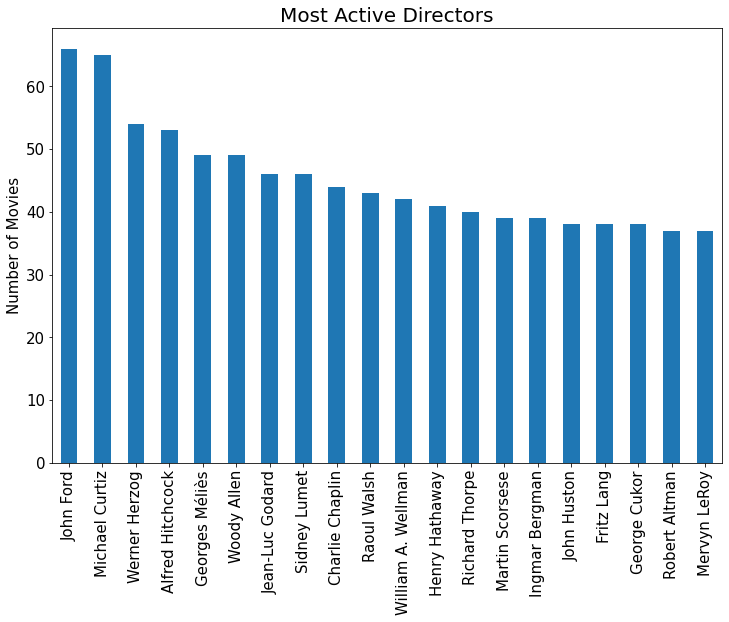

In [195]:
plt.figure(figsize = (12, 8))
df.director.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [194]:
# total revenue
df.groupby("director").revenue_musd.sum().nlargest(10)

director
Steven Spielberg     9256.621422
Peter Jackson        6528.244659
Michael Bay          6437.466781
James Cameron        5900.610310
David Yates          5334.563196
Christopher Nolan    4747.408665
Robert Zemeckis      4138.233542
Tim Burton           4032.916124
Ridley Scott         3917.529240
Chris Columbus       3866.836869
Name: revenue_musd, dtype: float64

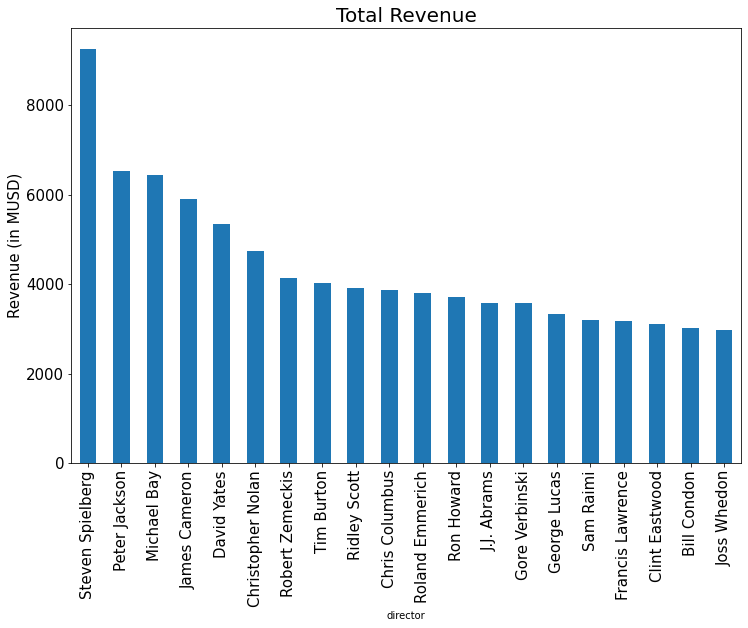

In [196]:
plt.figure(figsize = (12, 8))
df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [197]:
# mean rating
directors = df.groupby("director").agg({"title": "count", 
                                        "vote_average" :"mean", 
                                        "vote_count": "sum"})
directors

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.0,4.0
Davide Manuli,1,6.9,10.0
E.W. Swackhamer,1,5.9,5.0
Vitaliy Vorobyov,1,5.5,3.0
Yeon Sang-Ho,4,6.6,1039.0
...,...,...,...
Ярополк Лапшин,1,10.0,1.0
پیمان معادی,1,6.0,2.0
塩谷 直義,1,7.2,40.0


In [198]:
directors[(directors.vote_count >= 10000) & (directors.title >= 10)].nlargest(20, "vote_average")

,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.700000,14700.0
Christopher Nolan,11,7.618182,67344.0
Quentin Tarantino,10,7.490000,45910.0
Wes Anderson,10,7.370000,11743.0
David Fincher,10,7.350000,37588.0
Martin Scorsese,39,7.218421,35541.0
Peter Jackson,13,7.138462,47571.0
Joel Coen,17,7.023529,18139.0
James Cameron,11,6.927273,33736.0


In [199]:
#  based on movie genres
df.genres = df.genres.astype(str)

In [200]:
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Henry Joost            349.073570
David R. Ellis         348.742016
Adrian Lyne            346.110837
James DeMonaco         316.699354
Stephen Sommers        311.460501
Gore Verbinski         275.908490
Guillermo del Toro     261.629364
John R. Leonetti       255.273813
Fede Alvarez           254.643797
Jordan Peele           252.434250
Name: revenue_musd, dtype: float64